To visualize a preview of the NIFTI files, the following steps were followed

https://idiotdeveloper.com/read-3d-nifti-images-in-python3

https://neuraldatascience.io/8-mri/nifti.html

# Data Summary

In [134]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import cv2

In [135]:
import pandas as pd

In [136]:
BASE_DATASET_PATH = "/home/mateus/doutorado/datasets/auto-pet-iii/2024-05-10_Autopet_v1.1"

In [137]:
fdg_data = pd.read_csv(BASE_DATASET_PATH + "/fdg_metadata.csv")

In [138]:
fdg_data

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex
0,1.3.6.1.4.1.14519.5.2.1.4219.6651.201203836389...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:16.75,MELANOMA,063Y,F
1,1.3.6.1.4.1.14519.5.2.1.4219.6651.685145825998...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:44.865,MELANOMA,063Y,F
2,1.3.6.1.4.1.14519.5.2.1.4219.6651.151532511484...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,305,99.01 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:45.761,MELANOMA,061Y,M
3,1.3.6.1.4.1.14519.5.2.1.4219.6651.313152023416...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.31 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:47.839,MELANOMA,061Y,M
4,1.3.6.1.4.1.14519.5.2.1.4219.6651.331726561677...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:53.415,MELANOMA,063Y,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,1.3.6.1.4.1.14519.5.2.1.4219.6651.268371672619...,FDG-PET-CT-Lesions,NO,NaN,PETCT_ff1451316e,1.3.6.1.4.1.14519.5.2.1.4219.6651.172967091722...,PET-CT Ganzkoerper primaer mit KM,3/31/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.53 MB,./FDG-PET-CT-Lesions/PETCT_ff1451316e/03-31-20...,2022-03-17T21:50:46.509,NEGATIVE,073Y,M
3038,1.3.6.1.4.1.14519.5.2.1.4219.6651.236102552014...,FDG-PET-CT-Lesions,NO,NaN,PETCT_fe705ea1cc,1.3.6.1.4.1.14519.5.2.1.4219.6651.319090403244...,Unspecified CT ABDOMEN,12/29/2002,GK p.v.1 WF,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,1214,641.06 MB,./FDG-PET-CT-Lesions/PETCT_fe705ea1cc/12-29-20...,2022-03-17T21:51:00.132,LYMPHOMA,066Y,F
3039,1.3.6.1.4.1.14519.5.2.1.4219.6651.330497593503...,FDG-PET-CT-Lesions,NO,NaN,PETCT_ff39795341,1.3.6.1.4.1.14519.5.2.1.4219.6651.253687934564...,PET-CT Ganzkoerper primaer mit KM,9/22/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,11.13 MB,./FDG-PET-CT-Lesions/PETCT_ff39795341/09-22-20...,2022-03-17T21:51:04.996,NEGATIVE,073Y,F
3040,1.3.6.1.4.1.14519.5.2.1.4219.6651.117635362952...,FDG-PET-CT-Lesions,NO,NaN,PETCT_ff39795341,1.3.6.1.4.1.14519.5.2.1.4219.6651.253687934564...,PET-CT Ganzkoerper primaer mit KM,9/22/2005,GK p.v.3 s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,645,340.68 MB,./FDG-PET-CT-Lesions/PETCT_ff39795341/09-22-20...,2022-03-17T21:51:26.506,NEGATIVE,073Y,F


In [139]:
fdg_data.dtypes

Series UID               object
Collection               object
3rd Party Analysis       object
Data Description URI    float64
Subject ID               object
Study UID                object
Study Description        object
Study Date               object
Series Description       object
Manufacturer             object
Modality                 object
SOP Class Name           object
SOP Class UID            object
Number of Images          int64
File Size                object
File Location            object
Download Timestamp       object
diagnosis                object
age                      object
sex                      object
dtype: object

In [140]:
fdg_data["SOP Class Name"].value_counts()

SOP Class Name
Segmentation Storage                          1014
Positron Emission Tomography Image Storage    1014
CT Image Storage                              1014
Name: count, dtype: int64

In [141]:
fdg_data[fdg_data["SOP Class Name"] == "Positron Emission Tomography Image Storage"].diagnosis.value_counts()

diagnosis
NEGATIVE       513
MELANOMA       188
LUNG_CANCER    168
LYMPHOMA       145
Name: count, dtype: int64

# Choosing a Random Sample to Visualize

In [189]:
sample_record = fdg_data[fdg_data.diagnosis == "LUNG_CANCER"].sample(1).iloc[0]
sample_record["diagnosis"]

'LUNG_CANCER'

In [190]:
!ls $BASE_DATASET_PATH/imagesTr | grep "KM-27242"

fdg_b0e002e974_03-11-2007-NA-PET-CT Ganzkoerper  primaer mit KM-27242_0000.nii.gz
fdg_b0e002e974_03-11-2007-NA-PET-CT Ganzkoerper  primaer mit KM-27242_0001.nii.gz


The `0000` sufix consists of the CT-Scan images and the `0001` the PET-Scan images.

In [191]:
!ls $BASE_DATASET_PATH/labelsTr | grep "KM-27242"

fdg_b0e002e974_03-11-2007-NA-PET-CT Ganzkoerper  primaer mit KM-27242.nii.gz


In [192]:
data_to_show = fdg_data[fdg_data["Study UID"] == sample_record["Study UID"]]
data_to_show

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex
14,1.3.6.1.4.1.14519.5.2.1.4219.6651.133578453901...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0168f65af8,1.3.6.1.4.1.14519.5.2.1.4219.6651.304086288813...,PET-CT Ganzkoerper primaer mit KM,4/4/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0168f65af8/04-04-20...,2022-03-17T12:55:17.65,LUNG_CANCER,073Y,M
15,1.3.6.1.4.1.14519.5.2.1.4219.6651.113796169149...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0168f65af8,1.3.6.1.4.1.14519.5.2.1.4219.6651.304086288813...,PET-CT Ganzkoerper primaer mit KM,4/4/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0168f65af8/04-04-20...,2022-03-17T12:55:33.564,LUNG_CANCER,073Y,M
16,1.3.6.1.4.1.14519.5.2.1.4219.6651.913380603297...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0168f65af8,1.3.6.1.4.1.14519.5.2.1.4219.6651.304086288813...,PET-CT Ganzkoerper primaer mit KM,4/4/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0168f65af8/04-04-20...,2022-03-17T12:55:51.533,LUNG_CANCER,073Y,M


In [193]:
def get_image_path(record):
    prefix = record["Subject ID"].split("_")[-1]
    sufix = record["File Location"].split("/")[-2]
    folder = "labelsTr" if record["Modality"] == "SEG" else "imagesTr"
    
    final_number = ""
    if record["Modality"] == "CT":
        final_number = "_0000"
    if record["Modality"] == "PT":
        final_number = "_0001"
        
    return BASE_DATASET_PATH + f"/{folder}/fdg_{prefix}_{sufix}{final_number}.nii.gz"

## CT-Scan

In [237]:
# image_to_read = BASE_DATASET_PATH + "/imagesTr/fdg_b0e002e974_03-11-2007-NA-PET-CT Ganzkoerper  primaer mit KM-27242_0000.nii.gz"
image_to_read = data_to_show[data_to_show["Modality"] == "CT"].iloc[0]
image_to_read

Series UID              1.3.6.1.4.1.14519.5.2.1.4219.6651.913380603297...
Collection                                             FDG-PET-CT-Lesions
3rd Party Analysis                                                     NO
Data Description URI                                                  NaN
Subject ID                                               PETCT_0168f65af8
Study UID               1.3.6.1.4.1.14519.5.2.1.4219.6651.304086288813...
Study Description                      PET-CT Ganzkoerper  primaer mit KM
Study Date                                                       4/4/2003
Series Description                                               GK p.v.3
Manufacturer                                                      SIEMENS
Modality                                                               CT
SOP Class Name                                           CT Image Storage
SOP Class UID                                   1.2.840.10008.5.1.4.1.1.2
Number of Images                      

In [238]:
image_to_read["File Location"]

'./FDG-PET-CT-Lesions/PETCT_0168f65af8/04-04-2003-NA-PET-CT Ganzkoerper  primaer mit KM-82224/4.000000-GK p.v.3-44830'

In [239]:
get_image_path(image_to_read)

'/home/mateus/doutorado/datasets/auto-pet-iii/2024-05-10_Autopet_v1.1/imagesTr/fdg_0168f65af8_04-04-2003-NA-PET-CT Ganzkoerper  primaer mit KM-82224_0000.nii.gz'

In [240]:
!ls $BASE_DATASET_PATH/imagesTr | grep "nativ-27135"

fdg_f9c4d4f9ab_03-22-2007-NA-PET-CT Ganzkoerper nativ-27135_0000.nii.gz
fdg_f9c4d4f9ab_03-22-2007-NA-PET-CT Ganzkoerper nativ-27135_0001.nii.gz


In [241]:
nifti_img = nib.load(get_image_path(image_to_read))

In [242]:
nifti_img.shape

(400, 400, 326)

In [243]:
nifti_img.get_data_dtype()

dtype('<f4')

In [244]:
nifti_img.affine

array([[-2.03642011e+00,  0.00000000e+00,  0.00000000e+00,
         4.06738007e+02],
       [-0.00000000e+00,  2.03642011e+00,  0.00000000e+00,
        -1.74048584e+02],
       [ 0.00000000e+00, -0.00000000e+00,  3.00000000e+00,
        -1.31800000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [245]:
ct_image = nifti_img.get_fdata()[:,:,224]
ct_image2 = nifti_img.get_fdata()[:,200,:]
ct_image3 = nifti_img.get_fdata()[200,:,:]

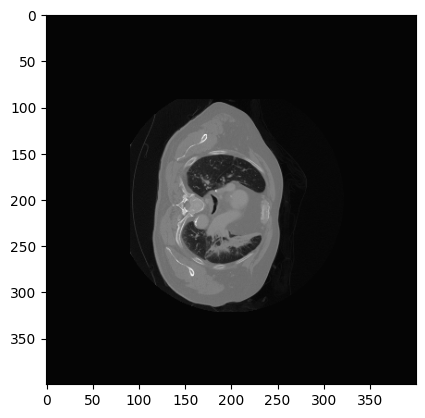

In [246]:
plt.imshow(ct_image, cmap="gray")

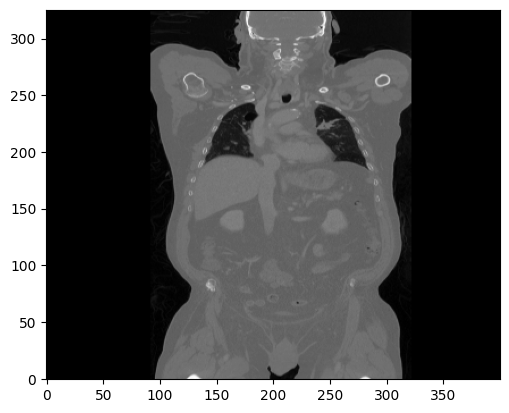

In [247]:
plt.imshow(ct_image2.T, cmap="gray", origin='lower')

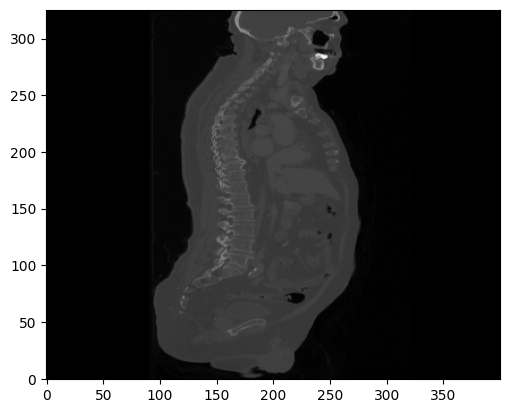

In [248]:
plt.imshow(ct_image3.T, cmap="gray", origin='lower')

## Slices in Other Angles

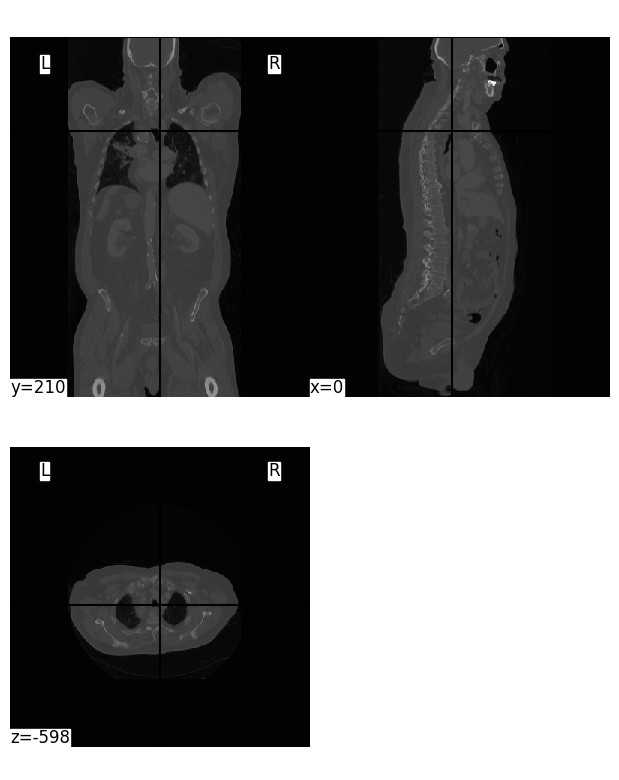

In [250]:
plotting.plot_img(nifti_img, display_mode='tiled', cmap='gray', cut_coords=(0, 210, -598))
plt.show()

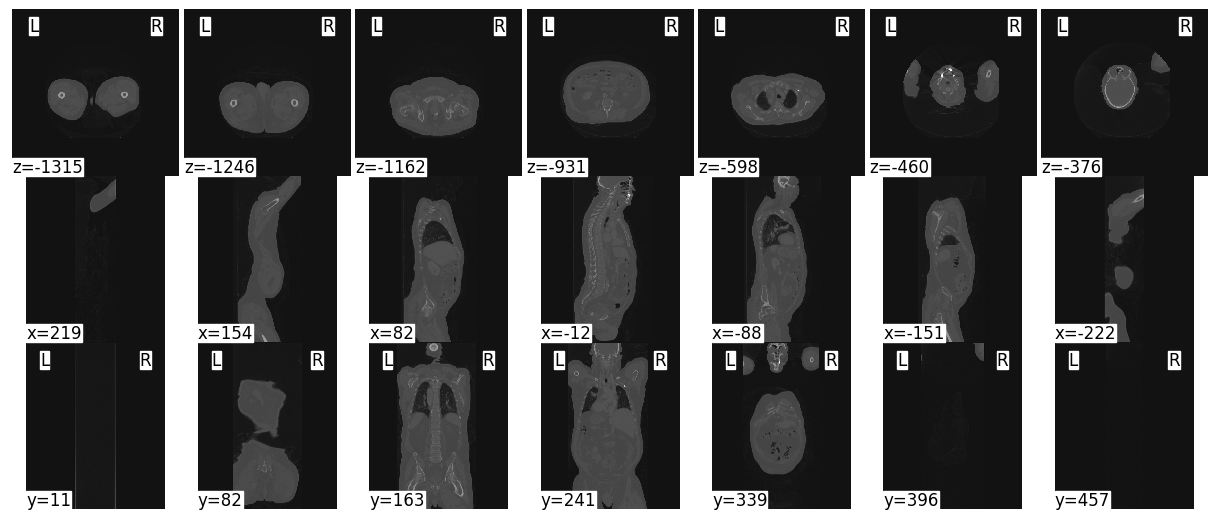

In [207]:
plotting.plot_img(nifti_img, display_mode="mosaic", cmap="gray")
plt.show()

### All Images

In [161]:
# TRECHO COMENTADO DADO A GRANDE QUANTIDADE DE IMAGENS DE SAÍDA

# image_data = nifti_img.get_fdata()

# for i in range(image_data.shape[2]):
#     plt.imshow(image_data[:,:,i], cmap="gray")
#     plt.show()

## PET-Scan

In [251]:
# image_to_read = BASE_DATASET_PATH + "/imagesTr/fdg_b0e002e974_03-11-2007-NA-PET-CT Ganzkoerper  primaer mit KM-27242_0001.nii.gz"
image_to_read = data_to_show[data_to_show["Modality"] == "PT"].iloc[0]
image_to_read

Series UID              1.3.6.1.4.1.14519.5.2.1.4219.6651.113796169149...
Collection                                             FDG-PET-CT-Lesions
3rd Party Analysis                                                     NO
Data Description URI                                                  NaN
Subject ID                                               PETCT_0168f65af8
Study UID               1.3.6.1.4.1.14519.5.2.1.4219.6651.304086288813...
Study Description                      PET-CT Ganzkoerper  primaer mit KM
Study Date                                                       4/4/2003
Series Description                                              PET corr.
Manufacturer                                                      SIEMENS
Modality                                                               PT
SOP Class Name                 Positron Emission Tomography Image Storage
SOP Class UID                                 1.2.840.10008.5.1.4.1.1.128
Number of Images                      

In [252]:
get_image_path(image_to_read)

'/home/mateus/doutorado/datasets/auto-pet-iii/2024-05-10_Autopet_v1.1/imagesTr/fdg_0168f65af8_04-04-2003-NA-PET-CT Ganzkoerper  primaer mit KM-82224_0001.nii.gz'

In [253]:
nifti_img = nib.load(get_image_path(image_to_read))

In [254]:
nifti_img.shape

(400, 400, 326)

In [255]:
nifti_img.get_data_dtype()

dtype('<f4')

In [256]:
nifti_img.affine

array([[-2.03642011e+00,  0.00000000e+00,  0.00000000e+00,
         4.06738007e+02],
       [-0.00000000e+00,  2.03642011e+00,  0.00000000e+00,
        -1.74048584e+02],
       [ 0.00000000e+00, -0.00000000e+00,  3.00000000e+00,
        -1.31800000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [257]:
pet_image = nifti_img.get_fdata()[:,:,224]
pet_image1 = nifti_img.get_fdata()[:,200,:]
pet_image2 = nifti_img.get_fdata()[200,:,:]

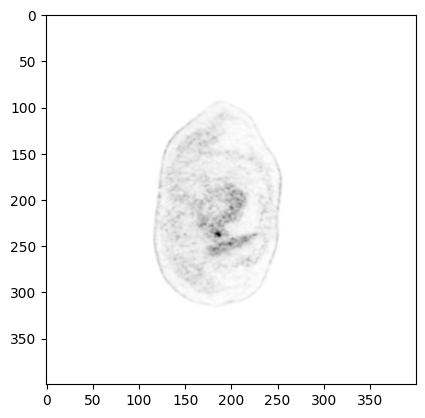

In [258]:
plt.imshow(pet_image, cmap="gist_yarg")

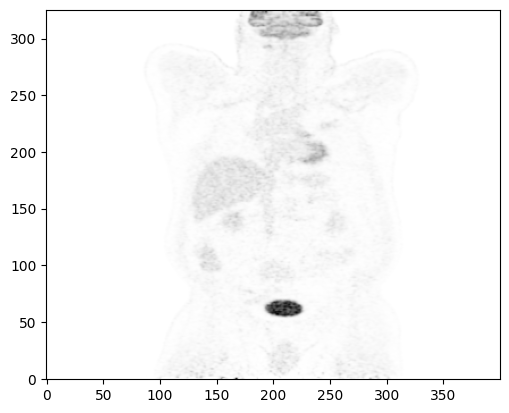

In [259]:
plt.imshow(pet_image1.T, cmap="gist_yarg", origin='lower')

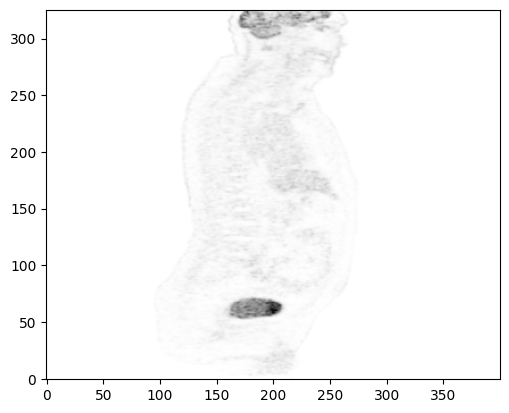

In [260]:
plt.imshow(pet_image2.T, cmap="gist_yarg", origin='lower')

### Slices in Other Angles

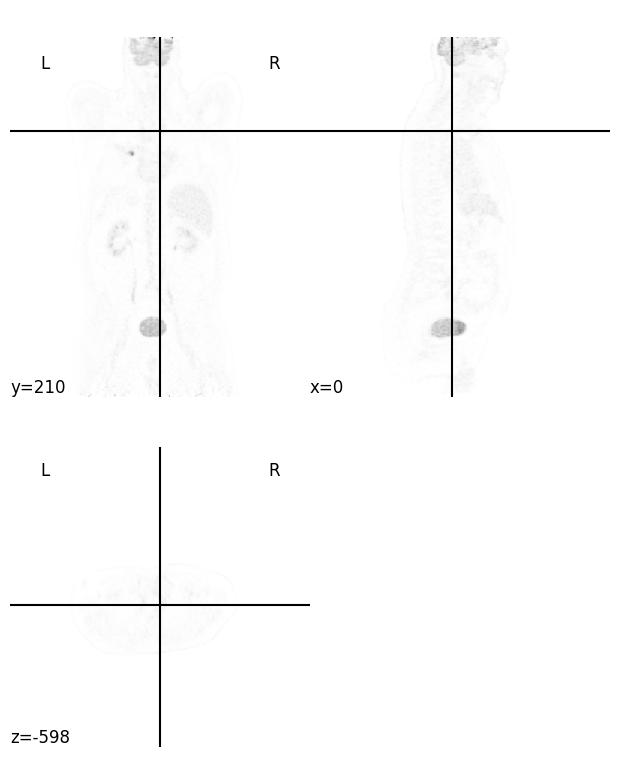

In [261]:
plotting.plot_img(nifti_img, display_mode='tiled', cmap='gist_yarg', cut_coords=(0, 210, -598))
plt.show()

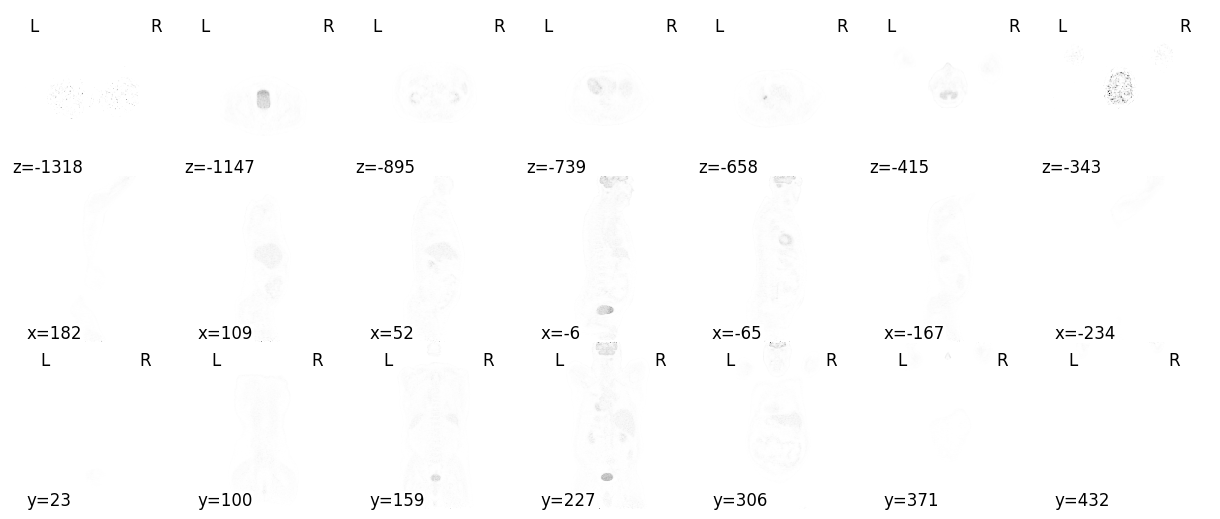

In [263]:
plotting.plot_img(nifti_img, display_mode="mosaic", cmap="gist_yarg")
plt.show()

### All Images

In [264]:
# TRECHO COMENTADO DADO A GRANDE QUANTIDADE DE IMAGENS DE SAÍDA

# image_data = nifti_img.get_fdata()

# for i in range(image_data.shape[2]):
#     plt.imshow(image_data[:,:,i], cmap="gist_yarg")
#     plt.show()

## Labels (Segmentation)

In [265]:
# image_to_read = BASE_DATASET_PATH + "/labelsTr/fdg_b0e002e974_03-11-2007-NA-PET-CT Ganzkoerper  primaer mit KM-27242.nii.gz"
image_to_read = data_to_show[data_to_show["Modality"] == "SEG"].iloc[0]
image_to_read

Series UID              1.3.6.1.4.1.14519.5.2.1.4219.6651.133578453901...
Collection                                             FDG-PET-CT-Lesions
3rd Party Analysis                                                     NO
Data Description URI                                                  NaN
Subject ID                                               PETCT_0168f65af8
Study UID               1.3.6.1.4.1.14519.5.2.1.4219.6651.304086288813...
Study Description                      PET-CT Ganzkoerper  primaer mit KM
Study Date                                                       4/4/2003
Series Description                                           Segmentation
Manufacturer                                                        QIICR
Modality                                                              SEG
SOP Class Name                                       Segmentation Storage
SOP Class UID                                1.2.840.10008.5.1.4.1.1.66.4
Number of Images                      

In [266]:
nifti_img = nib.load(get_image_path(image_to_read))

In [267]:
nifti_img.shape

(400, 400, 326)

In [268]:
nifti_img.get_data_dtype()

dtype('uint8')

In [269]:
nifti_img.affine

array([[-2.03642011e+00,  0.00000000e+00,  0.00000000e+00,
         4.06738007e+02],
       [-0.00000000e+00,  2.03642011e+00,  0.00000000e+00,
        -1.74048584e+02],
       [ 0.00000000e+00, -0.00000000e+00,  3.00000000e+00,
        -1.31800000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [270]:
seg_image = nifti_img.get_fdata()[:,:,224]
seg_image1 = nifti_img.get_fdata()[:,200,:]
seg_image2 = nifti_img.get_fdata()[200,:,:]

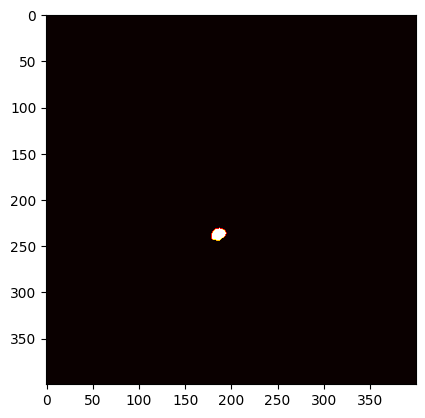

In [271]:
plt.imshow(seg_image, cmap="hot")

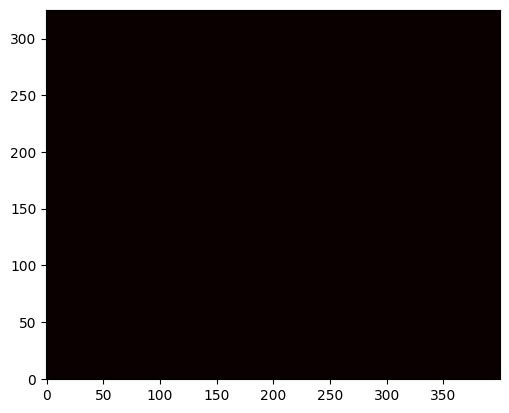

In [272]:
plt.imshow(seg_image1.T, cmap="hot", origin='lower')

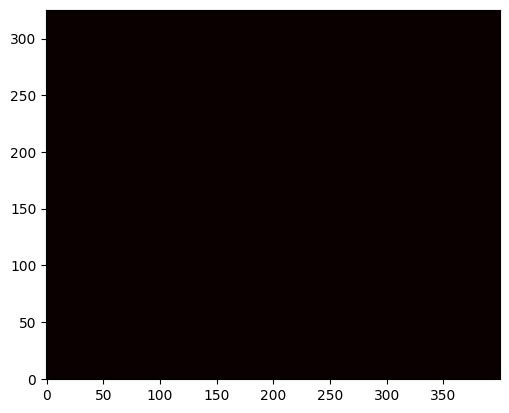

In [273]:
plt.imshow(seg_image2.T, cmap="hot", origin='lower')

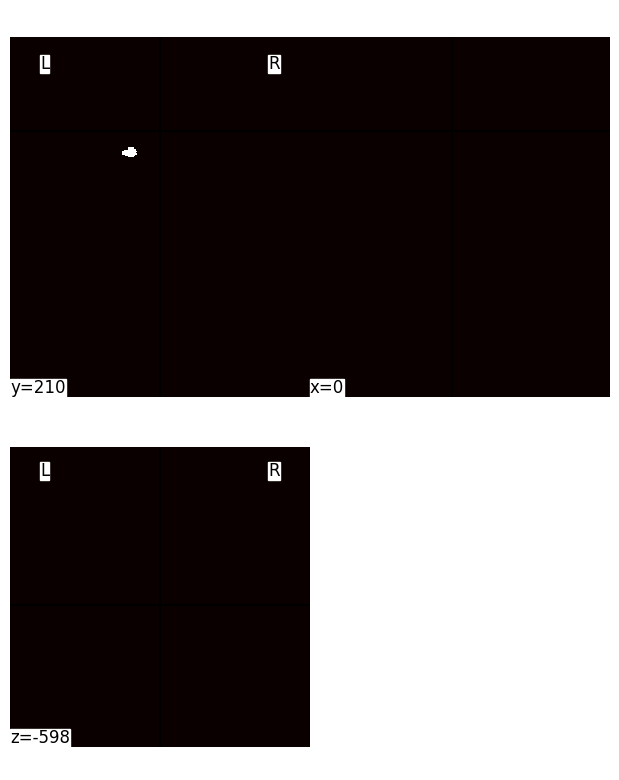

In [278]:
plotting.plot_img(nifti_img, display_mode='tiled', cmap='hot', cut_coords=(0, 210, -598))
plt.show()

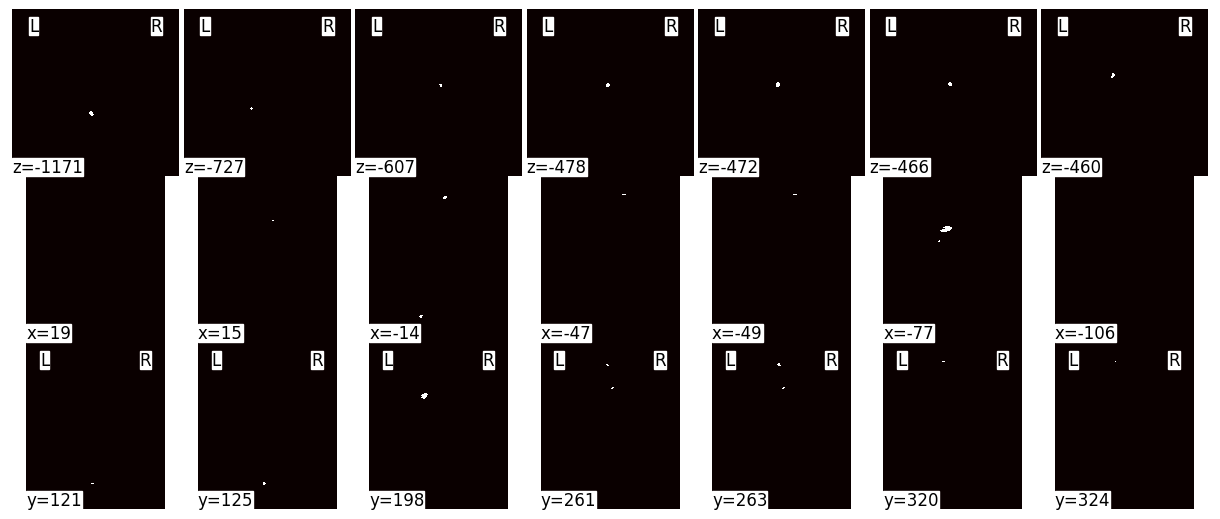

In [279]:
plotting.plot_img(nifti_img, display_mode="mosaic", cmap="hot")
plt.show()

### All Images

In [280]:
# TRECHO COMENTADO DADO A GRANDE QUANTIDADE DE IMAGENS DE SAÍDA

# image_data = nifti_img.get_fdata()

# for i in range(image_data.shape[2]):
#     plt.imshow(image_data[:,:,i], cmap="hot")
#     plt.show()

# PET/CT + Segmentation Images

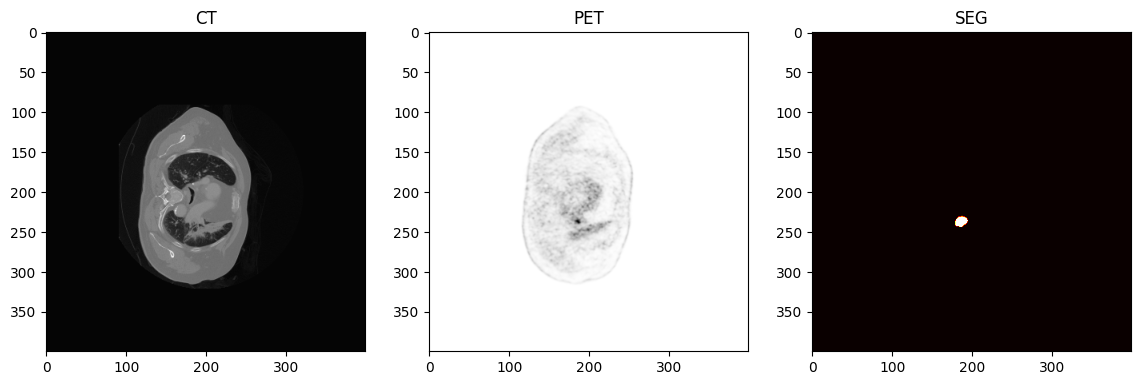

In [281]:
fig = plt.figure(figsize=(14,9))

fig.add_subplot(1, 3, 1)
plt.imshow(ct_image, cmap="gray")
plt.title("CT")

fig.add_subplot(1, 3, 2)
plt.imshow(pet_image, cmap="gist_yarg")
plt.title("PET")

fig.add_subplot(1, 3, 3)
plt.imshow(seg_image, cmap="hot")
plt.title("SEG")

plt.show()

In [298]:
flattened_segmentation_image = seg_image.flatten()

In [306]:
print("total pixels: %d" % seg_image.flatten().size)
print("segmentation pixels: %d" % seg_image[seg_image != 0].size)

total pixels: 160000
segmentation pixels: 159


De forma a reanotar as imagens utilizando-se das máscaras de segmentação dos tumores, é possível utilizar um filtro por pixels de valor diferente de zero. Caso haja alguma ocorrência, significa que há algum tumor na respectiva fatia.

O novo conjunto de dados deverá ser organizado da seguinte forma num novo dataframe (csv):
- study_id (necessário para manter os mesmos estudos/indivíduos num mesmo conjunto no particionamento)
- modality (CT, PT - SEG não será mais necessário, dado que será refletido na classe)
- section_plane (plano de corte da imagem: transverse, coronal, sagital)
- image_num_plane (identificador sequencial da imagem no respectivo plano de corte)
- image_file_path (path para o arquivo de imagem extraído)
- class (0, caso não haja tumor, 1 caso haja tumor - obtido a partir da imagem da segmentação)